C:\Users\CUSTOMER\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


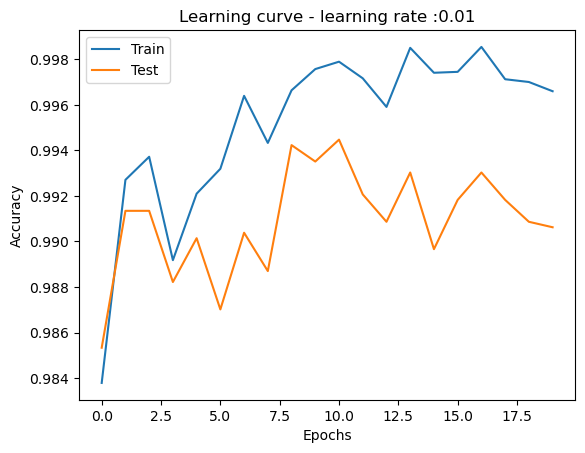

C:\Users\CUSTOMER\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


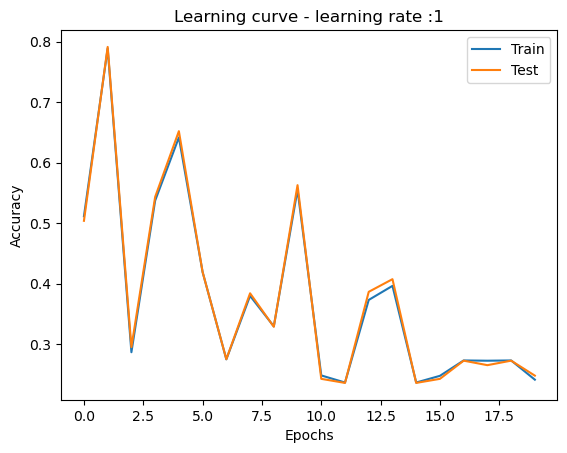

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

def show_learning_curve(eta):
    mlp = MLPClassifier(hidden_layer_sizes=(200,100), solver='adam', warm_start=True, max_iter=1, learning_rate_init=eta)
    trn_score_list = []
    tst_score_list = []
    for i in range(20):
        mlp.fit(trn_feats, trn_labels)
        trn_score_list.append(mlp.score(trn_feats, trn_labels))
        tst_score_list.append(mlp.score(tst_feats, tst_labels))
    plt.plot(trn_score_list, label='Train')
    plt.plot(tst_score_list, label='Test')
    plt.title('Learning curve - learning rate :{}'.format(eta))
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.legend()
    plt.show()

train_df = pd.read_csv('mnist_train_final.csv')
test_df = pd.read_csv('mnist_test_final.csv')
train_df = train_df[(train_df['label']==1) | (train_df['label']==2) | (train_df['label']==3) | (train_df['label']==4)]
test_df = test_df[(test_df['label']==1) | (test_df['label']==2) | (test_df['label']==3) | (test_df['label']==4)]

trn_feats = train_df.loc[:, train_df.columns != 'label']
tst_feats = test_df.loc[:, test_df.columns != 'label']
trn_labels = train_df['label']
tst_labels = test_df['label']
# normalization
trn_feats /= 255
tst_feats /= 255

show_learning_curve(eta=0.01)
show_learning_curve(eta=1)